In [14]:
import lightkurve as lk
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp

def TransitGraph(Star, Lum, StarMass, StarRadius, StarType):
    #Above, Star = string star name
    #Lum = Solar Luminosities 
    #Star Radius 
    search_result = lk.search_lightcurve(Star, author='Kepler', cadence='long')

    # Download all available Kepler light curves
    lc_collection = search_result.download_all()
    #lc_collection.plot();
    search_result
    lc = lc_collection.stitch()
    lc2 = lc.flatten(window_length=901)

    #lc2.plot();

    # Create array of periods to search
    period = np.linspace(1, 20, 10000)
    # Create a BLSPeriodogram
    bls = lc.to_periodogram(method='bls', period=period, frequency_factor=500);
    #bls.plot();

    planet_b_period = bls.period_at_max_power
    planet_b_t0 = bls.transit_time_at_max_power
    planet_b_dur = bls.duration_at_max_power

    # Check the value for period
    planet_period = planet_b_period
    planet_b_model = bls.get_transit_model(period=planet_b_period,
                                           transit_time=planet_b_t0,
                                           duration=planet_b_dur)
    ax = lc.fold(planet_b_period, planet_b_t0).scatter()
    #planet_b_model.fold(planet_b_period, planet_b_t0).plot(ax=ax, c='r', lw=2)
    ax.set_xlim(-5, 5);
    ax.set_ylim(0.995, 1.0025)


    df = planet_b_model.fold(planet_b_period, planet_b_t0)
    df
    df2 = lc.fold(planet_b_period, planet_b_t0)
    
    PlanetSize(Lum, planet_period, StarMass, StarRadius, df, df2)
    HabitableZone(Lum, planet_period, StarMass, StarType)
#lc.interact_bls()
#plt.plot(df["TimeDelta"], df["float64"])
def PlanetSize(Lum, OP, StarMass, StarRadius, df, df2):
    time = []
    for i in df["time"]:
        time.append(i)
    fluxMod = []
    for i in df["flux"]:
        fluxMod.append(i)
    fluxMod2 = []
    for j in df2["flux"]:
        fluxMod2.append(j)

    ratio = 1 - min(fluxMod2)

    starsize = 1.28539*69634e4
    planetsize = starsize*sp.sqrt(ratio)
    planetSize_inEarth = planetsize/6371000
    print("The size of the planet is", planetSize_inEarth, "earth radii")
"""The function for the habitable zone"""
def HabitableZone(Lum, OP, StarMass, StarType):
    #Calculation of SemiMajorAx
    Lum = Lum*3.827e26
    StarMass = StarMass*1.98e30
    OP = OP*3600*24
    G = 6.67e-11
    sigma = 5.67e-8
    res = OP*OP*G*StarMass/(4*sp.pi*sp.pi)
    PlanetORm = pow(res, 1/3)
    PlanetOR = pow(res, 1/3)/(1.49e11)
    
    #Begin Calculation of planet temperature 
    albedo = 0.3 #(assumed to be the albedo of earth)
    flux_recived = Lum/(4*np.pi*PlanetORm*PlanetORm*albedo)
    planet_temperature = pow(flux_recived/sigma, 0.25)
    
    print("The temperature of the planet is", planet_temperature, "Kelvin")
    
    #Calculation of HZ Range:
    ROuter = sp.sqrt(Lum/(sigma*pow(275, 4)*4*sp.pi*sp.pi))/(1.49e11)
    RInner = sp.sqrt(Lum/(sigma*pow(375, 4)*4*sp.pi*sp.pi))/(1.49e11)
    
  
    print("The HZ zone is from", RInner, "AU to", ROuter, "AU.")
    print("The planet's OR is", PlanetOR)
    print("The type of star is", StarType)
"""We need manually look for stars and give the orbital period, mass of the star, and luminosity"""


'We need manually look for stars and give the orbital period, mass of the star, and luminosity'

/tmp/ipykernel_14000/3807903283.py:61: DeprecationWarning: scipy.sqrt is deprecated and will be removed in SciPy 2.0.0, use numpy.lib.scimath.sqrt instead
  planetsize = starsize*sp.sqrt(ratio)
/tmp/ipykernel_14000/3807903283.py:84: DeprecationWarning: scipy.sqrt is deprecated and will be removed in SciPy 2.0.0, use numpy.lib.scimath.sqrt instead
  ROuter = sp.sqrt(Lum/(sigma*pow(275, 4)*4*sp.pi*sp.pi))/(1.49e11)
/tmp/ipykernel_14000/3807903283.py:85: DeprecationWarning: scipy.sqrt is deprecated and will be removed in SciPy 2.0.0, use numpy.lib.scimath.sqrt instead
  RInner = sp.sqrt(Lum/(sigma*pow(375, 4)*4*sp.pi*sp.pi))/(1.49e11)


The size of the planet is 6.843344942597032 earth radii
The temperature of the planet is 1480.3577667104846 1 / d(1/3) Kelvin
The HZ zone is from 0.5011744088178802 AU to 0.9319358841654796 AU.
The planet's OR is 0.10407163033784016 d(2/3)
The type of star is G


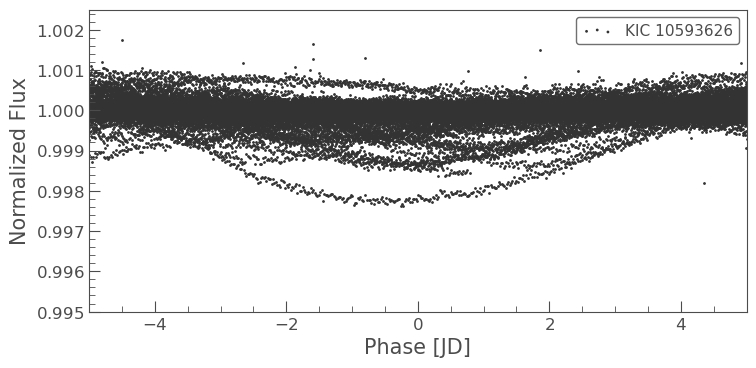

In [15]:
TransitGraph("Kepler-22", 0.645, 0.989, 0.855, "G")

/tmp/ipykernel_14000/3807903283.py:61: DeprecationWarning: scipy.sqrt is deprecated and will be removed in SciPy 2.0.0, use numpy.lib.scimath.sqrt instead
  planetsize = starsize*sp.sqrt(ratio)
/tmp/ipykernel_14000/3807903283.py:84: DeprecationWarning: scipy.sqrt is deprecated and will be removed in SciPy 2.0.0, use numpy.lib.scimath.sqrt instead
  ROuter = sp.sqrt(Lum/(sigma*pow(275, 4)*4*sp.pi*sp.pi))/(1.49e11)
/tmp/ipykernel_14000/3807903283.py:85: DeprecationWarning: scipy.sqrt is deprecated and will be removed in SciPy 2.0.0, use numpy.lib.scimath.sqrt instead
  RInner = sp.sqrt(Lum/(sigma*pow(375, 4)*4*sp.pi*sp.pi))/(1.49e11)


The size of the planet is 12.602047559269003 earth radii
The temperature of the planet is 3508.0800006470517 1 / d(1/3) Kelvin
The HZ zone is from 1.322306704481474 AU to 2.458834781060592 AU.
The planet's OR is 0.048895632327184656 d(2/3)
The type of star is F4IV


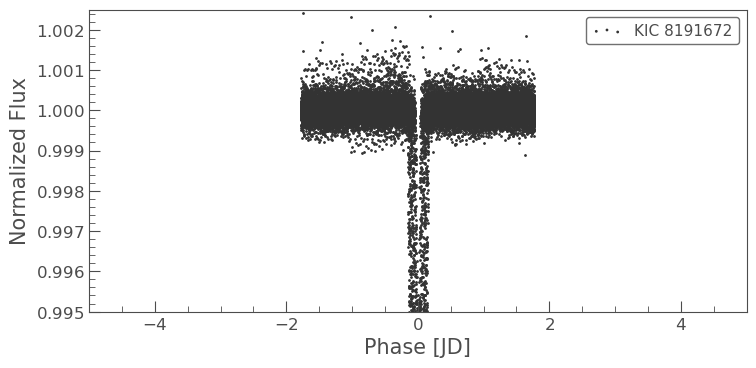

In [18]:
TransitGraph("Kepler-5", 4.49,1.23, 1.78, "F4IV")
#

/tmp/ipykernel_14000/3807903283.py:61: DeprecationWarning: scipy.sqrt is deprecated and will be removed in SciPy 2.0.0, use numpy.lib.scimath.sqrt instead
  planetsize = starsize*sp.sqrt(ratio)
/tmp/ipykernel_14000/3807903283.py:84: DeprecationWarning: scipy.sqrt is deprecated and will be removed in SciPy 2.0.0, use numpy.lib.scimath.sqrt instead
  ROuter = sp.sqrt(Lum/(sigma*pow(275, 4)*4*sp.pi*sp.pi))/(1.49e11)
/tmp/ipykernel_14000/3807903283.py:85: DeprecationWarning: scipy.sqrt is deprecated and will be removed in SciPy 2.0.0, use numpy.lib.scimath.sqrt instead
  RInner = sp.sqrt(Lum/(sigma*pow(375, 4)*4*sp.pi*sp.pi))/(1.49e11)


The size of the planet is 15.22761959778726 earth radii
The temperature of the planet is 819.3357652412395 1 / d(1/3) Kelvin
The HZ zone is from 0.1718080988899238 AU to 0.3194778698366352 AU.
The planet's OR is 0.11646532714519375 d(2/3)
The type of star is M


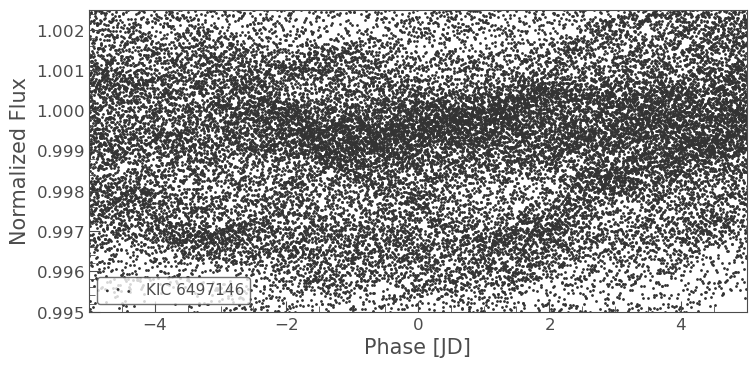

In [21]:
"""

Kepler-5: Mass (1.23), Size (1.78), Lum (4.49) F4IV
Kepler-6: Mass (0.990), Size (1.3147), Lum (1.55) G0
Kepler-7: Mass (1.1), Size (2.08), Lum (4.97) G0
Kepler-8: Mass (1.18), Size (1.58), Lum (3.286) F5V
Kepler-9: Mass (1.03), SIze (1.05), Lum (1.089) G2V

         

Kepler 22: 0.989 0.855 0.645 G   (Mass,Size, Lum ,Type)  
Kepler 442: 1.07 1.28  1.766 G  (Mass,Size, Lum ,Type)  
Kepler 438: 0.6337200 0.6588530 0.0758 M  (Mass,Size, Lum ,Type)  
Kepler 439: 0.96, 0.947, 0.7266 G (Mass,Size, Lum ,Type)  
Kepler 440: 0.6366 0.662 0.0907 M (Mass,Size, Lum ,Type)  






TransitGraph(Star, Lum, StarMass, StarRadius, StarType)
Instructions:
go to https://exoplanetarchive.ipac.caltech.edu/ and input any star name (Kepler 56 is an example)

The search results will show: [Star Name] Followed by Stellar Parameters 
Pick up the Radius, Mass, and raise the Luminoisty to the power of 10. Record the values 

IN def TransitGraph(Star, Lum, StarMass, StarRadius, StarType) put the info (Star is the star name). Let StarType be the 
spectral type if given otherwise let be "". 



"""





TransitGraph("Kepler-438",0.0758, 0.6337, 0.6588530, "M")

